##  Netflix Dataset Dataset
The main goal of this project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib and seaborn . 



https://drive.google.com/file/d/1p630pDcSkbQp_WXig8PeEVevZtSo4GQK/view?usp=sharing


### Tools


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)

# Data Wrangling


In [2]:
df=pd.read_csv("8. Netflix Dataset.csv")

In [3]:
# to show the frist three row
df.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [4]:
# to show the end three row
df.tail(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [6]:
#describe categorical features
dcf=df.describe(include="all")
dcf.drop(columns="Show_Id").transpose()

,count,unique,top,freq
Category,7789,2,Movie,5379
Title,7789,7787,The Lost Okoroshi,2
Director,5401,4050,"Raúl Campos, Jan Suter",18
Cast,7071,6831,David Attenborough,18
Country,7282,681,United States,2556
Release_Date,7779,1565,"January 1, 2020",118
Rating,7782,14,TV-MA,2865
Duration,7789,216,1 Season,1608
Type,7789,492,Documentaries,334
Description,7789,7769,Multiple women report their husbands as missin...,3


In [7]:
df.isna()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7784,False,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,False
7786,False,False,False,True,False,True,False,False,False,False,False
7787,False,False,False,True,False,False,False,False,False,False,False


<AxesSubplot:>

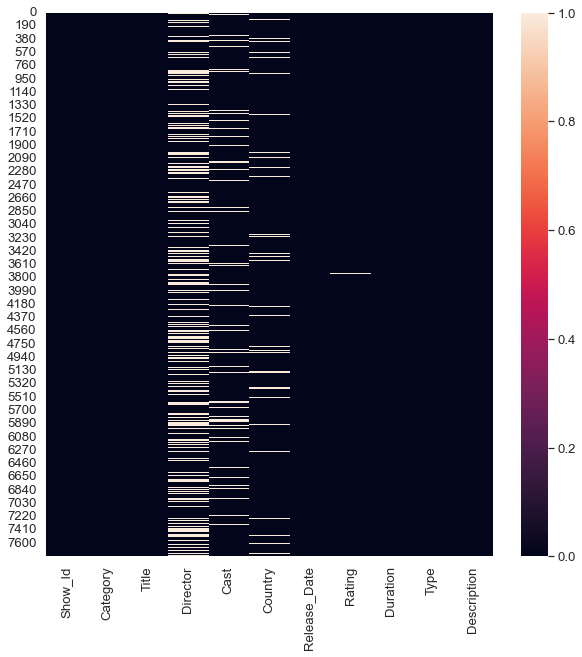

In [8]:
# heatmap to show missing values
sns.heatmap(df.isna())

In [9]:
# number of missing values
df.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [10]:
# ratio of missing values
df.isna().mean()*100

Show_Id          0.000000
Category         0.000000
Title            0.000000
Director        30.658621
Cast             9.218128
Country          6.509180
Release_Date     0.128386
Rating           0.089870
Duration         0.000000
Type             0.000000
Description      0.000000
dtype: float64

## Data Cleaning 

######   Information That We Need To Delete Or Modify
    1-We need to remove duplicate rows from the dataset

    2-Changing format of release date into datetime format

    3-Remove the unused colums that are not needes in the analysis process.
    
   

### 1. Remove Duplicate Rows

In [11]:
df.duplicated().sum()

2

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
print("Afetr Removing Duplicate Values number of rows = ",df.shape[0])

Afetr Removing Duplicate Values number of rows =  7787


### 2. Changing Format Of Release Date Into Datetime Format

In [14]:
df["Release_Date"][0]

'August 14, 2020'

In [15]:
df["Release_Date"][284]

' August 4, 2017'

In [16]:
df["Release_Date"]=df["Release_Date"].apply(lambda x:str(x).strip())

In [17]:
df["Release_Date"]=pd.to_datetime(df["Release_Date"],format="%B %d, %Y",errors="coerce")

In [18]:
df["Release_Date"][0]

Timestamp('2020-08-14 00:00:00')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      5399 non-null   object        
 4   Cast          7069 non-null   object        
 5   Country       7280 non-null   object        
 6   Release_Date  7777 non-null   datetime64[ns]
 7   Rating        7780 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Description   7787 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 988.1+ KB


### 3. Remove the unused colums that are not needes in the analysis process

In [20]:
df.drop(columns="Show_Id",inplace=True)

In [21]:
df.head()

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Exploratory Data Analysis

### insight 1 : Kinds of movies and their numbers

In [22]:
df["Category"].value_counts().to_frame()

,Category
Movie,5377
TV Show,2410


In [23]:
(df["Category"].value_counts(normalize=True)*100).to_frame()

,Category
Movie,69.050982
TV Show,30.949018


<AxesSubplot:xlabel='Category', ylabel='count'>

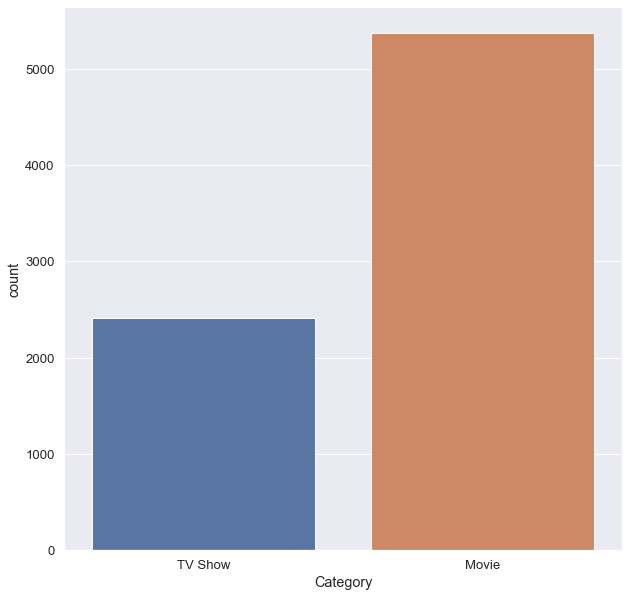

In [24]:
sns.countplot(data=df,x="Category")

### insight 2:Most 10 Directors make movies that has category "Movie"

In [25]:
df[df["Category"]=="Movie"]["Director"].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Johnnie To                 8
Name: Director, dtype: int64

In [26]:
Directors=list(df[df["Category"]=="Movie"]["Director"].value_counts().head(10).index)
Directors

['Raúl Campos, Jan Suter',
 'Marcus Raboy',
 'Jay Karas',
 'Cathy Garcia-Molina',
 'Youssef Chahine',
 'Jay Chapman',
 'Martin Scorsese',
 'Steven Spielberg',
 'David Dhawan',
 'Johnnie To']

In [27]:
Count_Movie=list(df[df["Category"]=="Movie"]["Director"].value_counts().head(10).values)
Count_Movie

[18, 15, 14, 13, 12, 12, 12, 10, 9, 8]

In [28]:
dic={"Directors":Directors,"Count_Movie":Count_Movie}
pd.DataFrame(dic)

,Directors,Count_Movie
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,15
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Youssef Chahine,12
5,Jay Chapman,12
6,Martin Scorsese,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Johnnie To,8


Text(0.5, 1.0, 'Top 10 Directors make Movies  that has category Movie')

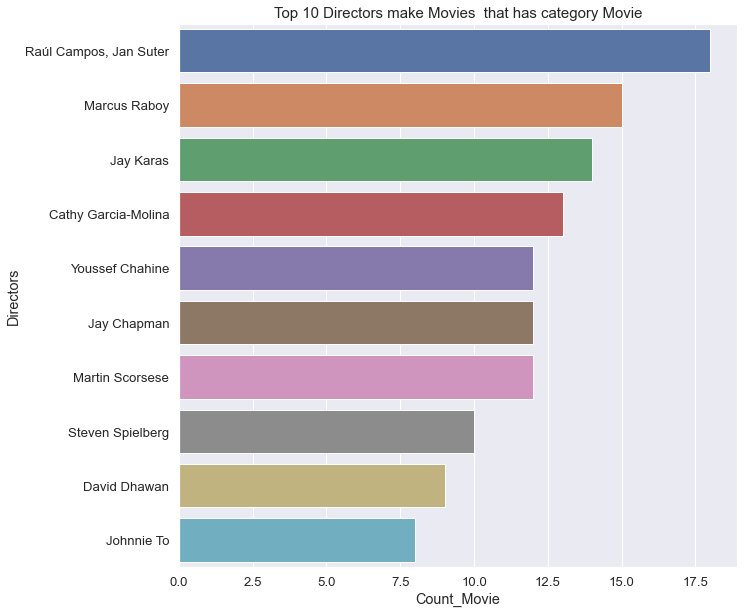

In [29]:
ax=sns.barplot(data=pd.DataFrame(dic),y="Directors",x="Count_Movie")
ax.set_title("Top 10 Directors make Movies  that has category Movie",fontsize = 15)

### insight 3:Most  6 Directors make movies that has category "TV Show"

In [30]:
df[df["Category"]=="TV Show"]["Director"].value_counts().head(6)

Alastair Fothergill    3
Shin Won-ho            2
Iginio Straffi         2
Rob Seidenglanz        2
Stan Lathan            2
Ken Burns              2
Name: Director, dtype: int64

Text(0.5, 1.0, 'Top 6 Directors make Movies  that has category TV Show')

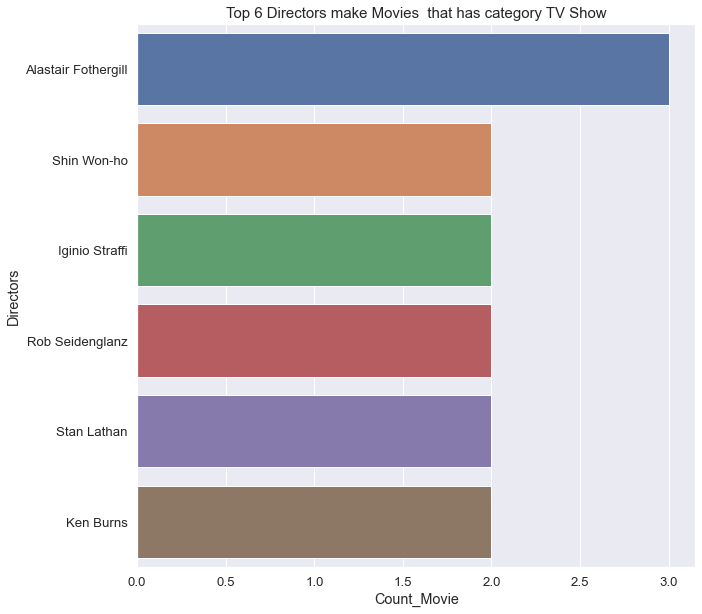

In [206]:
Directors=df[df["Category"]=="TV Show"]["Director"].value_counts().head(6).index
Count_Movie=df[df["Category"]=="TV Show"]["Director"].value_counts().head(6).values
dic={"Directors":Directors,"Count_Movie":Count_Movie}
ax=sns.barplot(data=pd.DataFrame(dic),y="Directors",x="Count_Movie")
ax.set_title("Top 6 Directors make Movies  that has category TV Show",fontsize = 15)

### insight 4:Most 10 Actor make movies 

In [32]:
#concatenate all the rows of the cast .
stringFromActors= df["Cast"].str.cat(sep = ',')
data = pd.Series(stringFromActors.split(','))
data.value_counts().head(10).to_frame()

,0
Anupam Kher,38
Takahiro Sakurai,28
Shah Rukh Khan,27
Om Puri,27
Boman Irani,25
Paresh Rawal,24
Andrea Libman,24
Yuki Kaji,23
Vincent Tong,22
Akshay Kumar,22


In [33]:
actors=list(data.value_counts().head(10).index)
actors


[' Anupam Kher',
 ' Takahiro Sakurai',
 'Shah Rukh Khan',
 ' Om Puri',
 ' Boman Irani',
 ' Paresh Rawal',
 ' Andrea Libman',
 ' Yuki Kaji',
 ' Vincent Tong',
 'Akshay Kumar']

In [34]:
count_movie=list(data.value_counts().head(10).values)
count_movie

[38, 28, 27, 27, 25, 24, 24, 23, 22, 22]

In [35]:
dict1={"Actors":actors,"count_movie":count_movie}

In [36]:
pd.DataFrame(dict1)

,Actors,count_movie
0,Anupam Kher,38
1,Takahiro Sakurai,28
2,Shah Rukh Khan,27
3,Om Puri,27
4,Boman Irani,25
5,Paresh Rawal,24
6,Andrea Libman,24
7,Yuki Kaji,23
8,Vincent Tong,22
9,Akshay Kumar,22


Text(0.5, 1.0, 'Top 10 Actor make Movies')

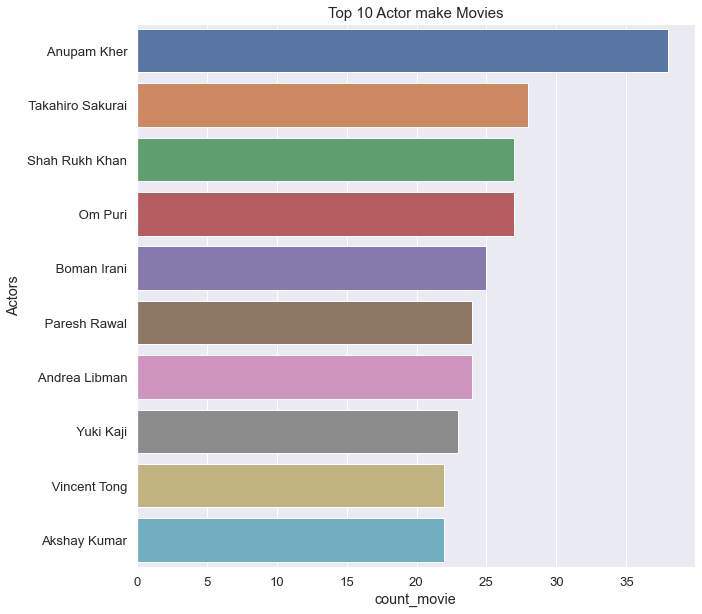

In [37]:
ax=sns.barplot(data=pd.DataFrame(dict1),y="Actors",x="count_movie")
ax.set_title("Top 10 Actor make Movies",fontsize = 15)

### insight 5: Movie & TV Show Rating

In [38]:
df["Dummy"]=1

In [39]:
pd.pivot_table(data=df,columns="Rating",index=df["Category"],values="Dummy",aggfunc="count",fill_value="Not Found")

Rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
Category,,,,,,,,,,,,,,
Movie,39.0,3.0,79.0,247.0,386.0,663.0,1272.0,111.0,1845.0,505.0,117.0,95.0,5.0,5.0
TV Show,Not Found,Not Found,5.0,Not Found,Not Found,2.0,659.0,83.0,1018.0,301.0,163.0,176.0,1.0,Not Found


In [40]:
df["Rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: Rating, dtype: int64

In [41]:
df["Rating"].isna().sum()

7

In [42]:
df[(df["Category"]=="TV Show") & (df["Rating"]=="PG-13")]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dummy


In [43]:
df[df["Rating"]=="PG-13"]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dummy
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1
44,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,2018-02-01,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an...",1
50,Movie,"10,000 B.C.",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...","United States, South Africa",2019-06-01,PG-13,109 min,Action & Adventure,Fierce mammoth hunter D'Leh sets out on an imp...,1
71,Movie,16 Blocks,Richard Donner,"Bruce Willis, Mos Def, David Morse, Jenna Ster...","United States, Germany",2019-11-01,PG-13,102 min,Action & Adventure,Tasked with escorting a prosecution witness to...,1
...,...,...,...,...,...,...,...,...,...,...,...
7683,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,2020-01-01,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,1
7690,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,2019-01-01,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...,1
7691,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,2019-01-01,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i...",1
7707,Movie,Yes Man,Peyton Reed,"Jim Carrey, Zooey Deschanel, Bradley Cooper, J...","United States, United Kingdom",2020-01-01,PG-13,104 min,"Comedies, Romantic Movies","After a bitter divorce, a bank drone falls und...",1


<AxesSubplot:xlabel='count', ylabel='Rating'>

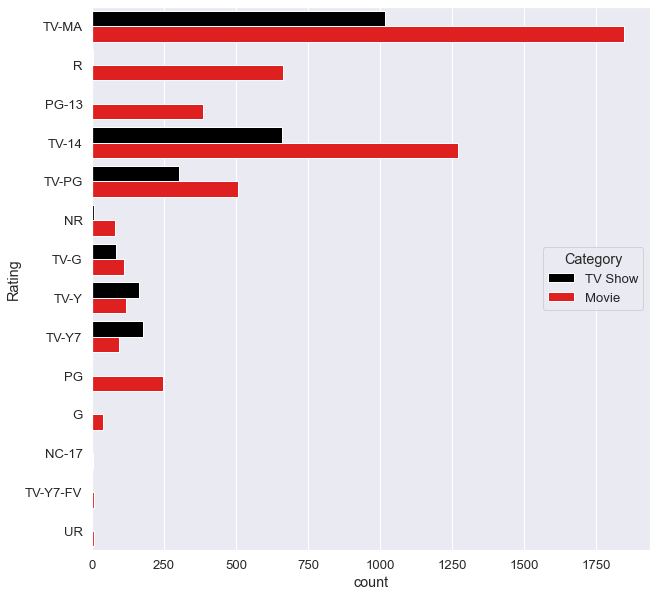

In [44]:
sns.countplot(data=df,y="Rating",hue="Category",palette=["black","red"])

### insight 6:10 top country make movies

In [45]:
df.head(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dummy
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1


In [46]:
df["Country"].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       nan, 'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, Unit

In [47]:
df["Country"][50]

'United States, South Africa'

In [48]:
Country_str=df["Country"].str.cat(sep=",").strip()

In [49]:
Country_str.split(",")

['Brazil',
 'Mexico',
 'Singapore',
 'United States',
 'United States',
 'Turkey',
 'Egypt',
 'United States',
 'India',
 'India',
 'United States',
 'Poland',
 ' United States',
 'Mexico',
 'Thailand',
 'United States',
 'Nigeria',
 'Norway',
 ' Iceland',
 ' United States',
 'India',
 'United Kingdom',
 'India',
 'India',
 'India',
 'India',
 'Japan',
 'United States',
 'United States',
 'South Korea',
 'Italy',
 'United States',
 'Canada',
 'Indonesia',
 'Indonesia',
 'United States',
 'Canada',
 'United States',
 'Romania',
 'Romania',
 'Spain',
 'Turkey',
 'Iceland',
 'Turkey',
 'Nigeria',
 'United States',
 'Turkey',
 'United States',
 'United States',
 'South Africa',
 ' Nigeria',
 'France',
 'United States',
 ' South Africa',
 'South Korea',
 'Spain',
 'United States',
 'Portugal',
 ' Spain',
 'United States',
 'United States',
 'Indonesia',
 'United Kingdom',
 'India',
 'United States',
 'South Korea',
 'United States',
 'United States',
 'United States',
 'United States',
 'Un

In [50]:
pd.Series(Country_str.split(","))

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
9062             India
9063         Australia
9064    United Kingdom
9065            Canada
9066     United States
Length: 9067, dtype: object

In [51]:
pd.Series(Country_str.split(",")).value_counts().head(10)

United States     2883
India              956
United Kingdom     577
 United States     414
Canada             259
Japan              237
France             196
South Korea        194
Spain              168
 France            153
dtype: int64

In [52]:
m=[]
for i in Country_str.split(","):
    
    m.append(i.strip())

In [53]:
pd.Series(m).value_counts().head(10)

United States     3297
India              990
United Kingdom     723
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
dtype: int64

Text(0.5, 1.0, '10 top country make movies')

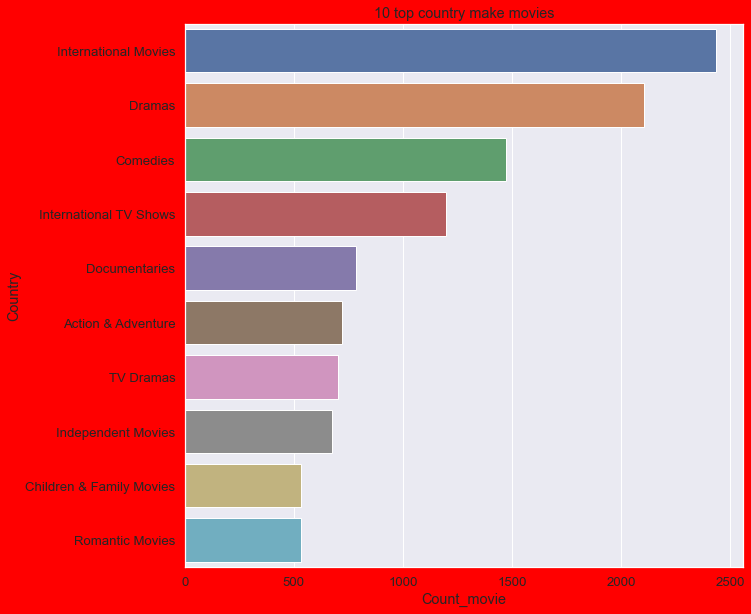

In [202]:
l1=list(pd.Series(m).value_counts().head(10).index)
l2=list(pd.Series(m).value_counts().head(10).values)
dic={"Country":l1,"Count_movie":l2}
pd.DataFrame(dic)
plt.figure(figsize=(10,10),facecolor="red")
sns.barplot(data=pd.DataFrame(dic),y="Country",x="Count_movie")
plt.title("10 top country make movies")

### insight 7:Which year has the highest release of movies?

In [55]:
df.head(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dummy
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1


In [56]:
df["Year"]=(df["Release_Date"].dt.year)
df["Month_Name"]=df["Release_Date"].dt.month_name()

In [57]:
df.head(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dummy,Year,Month_Name
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1,2020.0,August
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,2016.0,December


In [58]:
df["Year"].value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Year, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Year'>

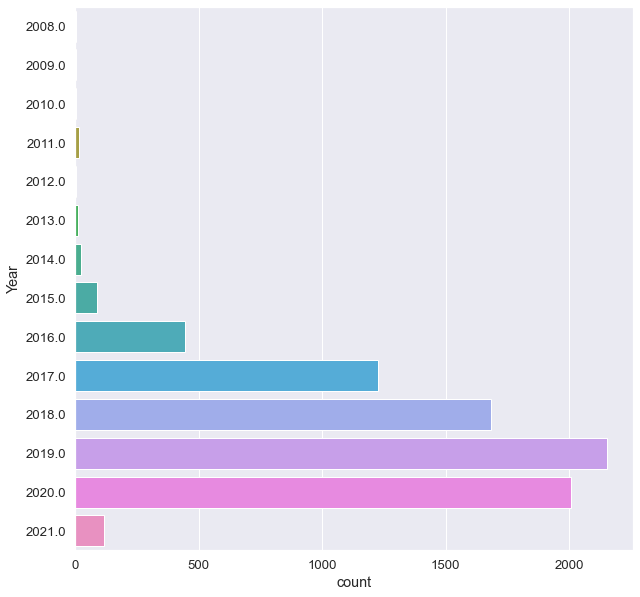

In [205]:
#plt.figure(figsize=(10,10),facecolor="blue")
sns.countplot(data=df,y="Year")

### insight 8: Which Month Released Highest Number Of Movies In All Of The Years?

In [60]:
df["Month_Name"].value_counts()

December     833
October      785
January      757
November     738
March        669
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Name: Month_Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'August'),
  Text(1, 0, 'December'),
  Text(2, 0, 'November'),
  Text(3, 0, 'January'),
  Text(4, 0, 'July'),
  Text(5, 0, 'June'),
  Text(6, 0, 'April'),
  Text(7, 0, 'October'),
  Text(8, 0, 'May'),
  Text(9, 0, 'March'),
  Text(10, 0, 'September'),
  Text(11, 0, 'February')])

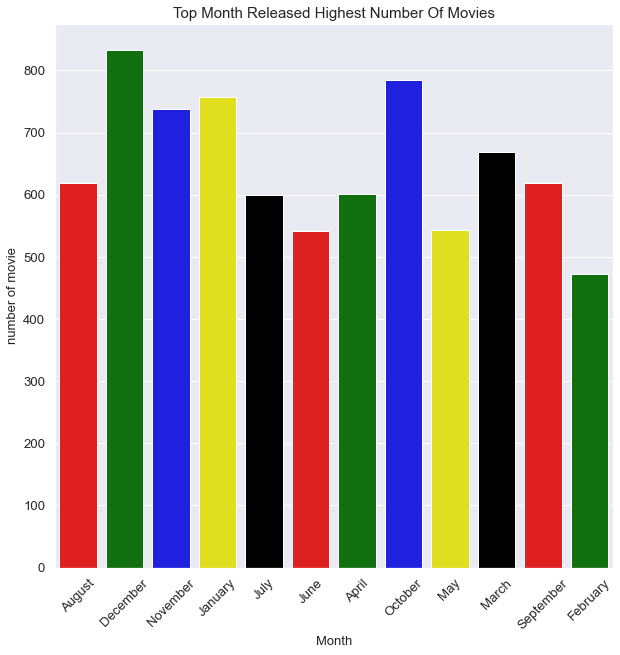

In [61]:
ax=sns.countplot(data=df,x="Month_Name",palette=["red","green","blue","yellow","black"])
ax.set_title("Top Month Released Highest Number Of Movies",fontsize = 15)
ax.set_xlabel("Month",fontsize = 13)
ax.set_ylabel("number of movie",fontsize = 13)
plt.xticks(rotation=45)

### Dealing with Duration

In [67]:
df1=df[(df["Category"]=="TV Show")]
df1.head()

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dummy,Year,Month_Name
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1,2020.0,August
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1,2017.0,July
11,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",1,2018.0,November
12,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,1,2019.0,May
16,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",1,2019.0,March


In [68]:
df1["Duration"].unique()

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

In [69]:
df1["season"]=df1["Duration"].apply(lambda x:int(x.split(" ")[0]))

C:\Users\PC\AppData\Local\Temp/ipykernel_7236/420075532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["season"]=df1["Duration"].apply(lambda x:int(x.split(" ")[0]))


In [80]:
df1["season"].describe()

count    2410.000000
mean        1.775934
std         1.596359
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: season, dtype: float64

<AxesSubplot:xlabel='season', ylabel='Density'>

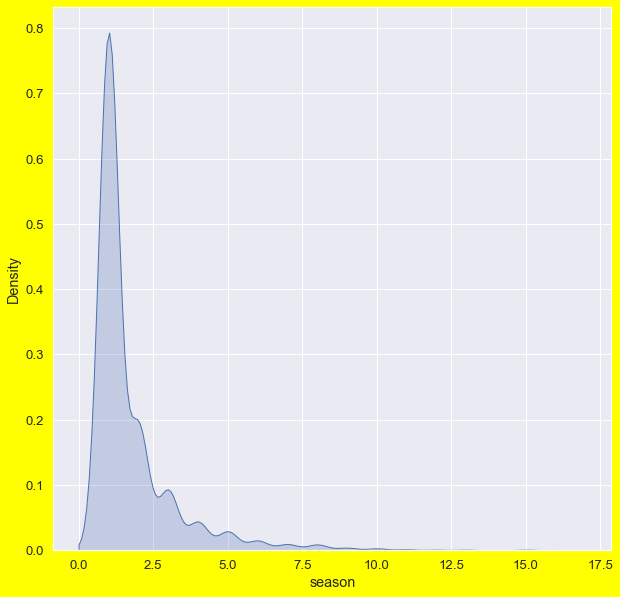

In [200]:
plt.figure(figsize=(10,10),facecolor="yellow")
sns.kdeplot(data=df1,x="season",shade=True)

In [70]:
df2=df[(df["Category"]=="Movie")]
df2.head()

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dummy,Year,Month_Name
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,2016.0,December
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,2018.0,December
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,2017.0,November
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020.0,January
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1,2020.0,June


In [71]:
df2["Duration"][1]

'93 min'

In [75]:
df2["min"]=df2["Duration"].apply(lambda x:int(x.split(" ")[0]))

C:\Users\PC\AppData\Local\Temp/ipykernel_7236/1390024788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["min"]=df2["Duration"].apply(lambda x:int(x.split(" ")[0]))


In [82]:
df2.head()

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dummy,Year,Month_Name,season,min
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,2016.0,December,93,93
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,2018.0,December,78,78
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,2017.0,November,80,80
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020.0,January,123,123
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1,2020.0,June,95,95


In [77]:
df2["min"].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: min, dtype: float64

<AxesSubplot:xlabel='min', ylabel='Density'>

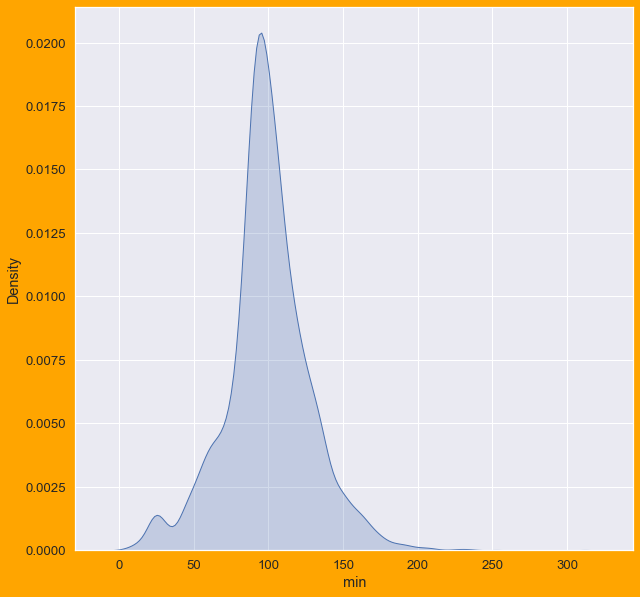

In [201]:
plt.figure(figsize=(10,10),facecolor="orange")
sns.kdeplot(data=df2,x="min",shade=True)

### insight 10: Which Genre Has The Highest Release Of Movies

In [146]:
df.head()

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Dummy,Year,Month_Name
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1,2020.0,August
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,2016.0,December
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,2018.0,December
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,2017.0,November
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020.0,January


In [147]:
stringFromtype= df["Type"].str.cat(sep = ',')
data = stringFromtype.split(',')
data

['International TV Shows',
 ' TV Dramas',
 ' TV Sci-Fi & Fantasy',
 'Dramas',
 ' International Movies',
 'Horror Movies',
 ' International Movies',
 'Action & Adventure',
 ' Independent Movies',
 ' Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows',
 ' TV Dramas',
 ' TV Mysteries',
 'Horror Movies',
 ' International Movies',
 'Dramas',
 'Horror Movies',
 ' International Movies',
 'Horror Movies',
 ' International Movies',
 ' Thrillers',
 'Dramas',
 ' Thrillers',
 'Crime TV Shows',
 ' International TV Shows',
 ' TV Dramas',
 'Crime TV Shows',
 ' Docuseries',
 ' International TV Shows',
 'Documentaries',
 ' International Movies',
 ' Sports Movies',
 'Independent Movies',
 ' Sci-Fi & Fantasy',
 ' Thrillers',
 'Dramas',
 ' International Movies',
 ' Thrillers',
 'International TV Shows',
 ' TV Dramas',
 'Dramas',
 ' Thrillers',
 'Comedies',
 ' Dramas',
 ' Independent Movies',
 'Sports Movies',
 'Dramas',
 ' Independent Movies',
 ' International Movies',
 'Action & Adventure',
 ' Dramas

In [148]:
m=[]
for i in data:
    
    m.append(i.strip())

In [149]:
m

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Horror Movies',
 'International Movies',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Crime TV Shows',
 'International TV Shows',
 'TV Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Documentaries',
 'International Movies',
 'Sports Movies',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Dramas',
 'International Movies',
 'Thrillers',
 'International TV Shows',
 'TV Dramas',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Sports Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 '

In [161]:
n=[]
for i in m:
    if i.find("&") == -1:
        n.append(i)
    else:
        n.append(i.split(" & ")[0])
        n.append(i.split(" & ")[-1])
        
        

In [162]:
n

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi',
 'Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Action',
 'Adventure',
 'Independent Movies',
 'Sci-Fi',
 'Fantasy',
 'Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Horror Movies',
 'International Movies',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Crime TV Shows',
 'International TV Shows',
 'TV Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Documentaries',
 'International Movies',
 'Sports Movies',
 'Independent Movies',
 'Sci-Fi',
 'Fantasy',
 'Thrillers',
 'Dramas',
 'International Movies',
 'Thrillers',
 'International TV Shows',
 'TV Dramas',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Sports Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Action',
 'Adventure',
 'Dramas',
 'International M

In [166]:
pd.Series(n).value_counts().head(10)

International Movies      2437
Dramas                    2106
Comedies                  1471
International TV Shows    1199
Adventure                  871
Documentaries              786
Action                     721
TV Dramas                  704
Independent Movies         673
Children                   532
dtype: int64

Text(0.5, 0, 'Genres')

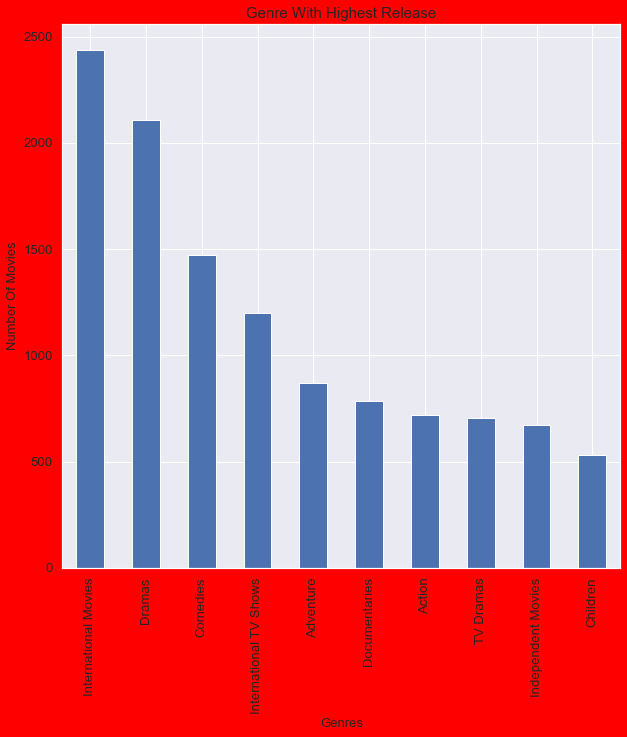

In [189]:
plt.figure(figsize=(10,10),facecolor="red")
pd.Series(n).value_counts().head(10).plot(kind="bar")
plt.title("Genre With Highest Release",fontsize=15)
plt.ylabel('Number Of Movies',fontsize=13)
plt.xlabel("Genres",fontsize= 13)

https://www.datacamp.com/community/tutorials/wordcloud-python

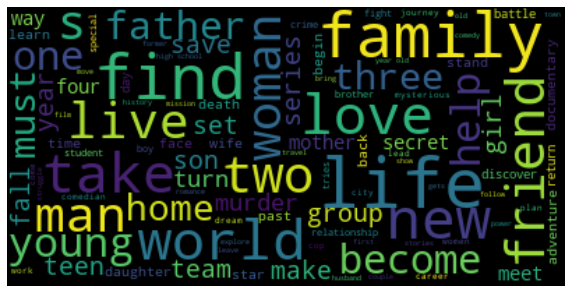

In [197]:
from wordcloud import WordCloud 
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate("".join(df["Description"]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
